### GAD skip 1

In [1]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 1',"% of additional relations skip 1"])

dataset = "gad"
for seed in seeds:
    # print(f"SEED value: {seed}")
    for sample_size in [12, 51, 89, 178, 258, 349, 450, 582, 706, 798]:
        kb_ = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples/{seed}/processed_csvs_skip_1_gad/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples/{seed}/{sample_size}_sample_val_{dataset}.csv")
        # full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['gene_mention'].lower(), row['disease_mention'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        # Count the matches
        matches_count = kb_['is_present'].sum()
        # print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100
        print(kb_.shape[0])
        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': original_sample['entity_pair'].shape[0],
            '# of additional relations skip 1': kb_['entity_pair'].shape[0],
            '% of additional relations skip 1': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 1']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 1']].astype(int)

2
28
75
183
369
651
1001
1594
2217
2907
1
26
60
237


/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

434
724
1064
1804
2489
3046
1
24
50
194
367
652


/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

967
1563
2310
2875


/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2534205935.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [2]:
results_df

,seed,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,0,12,12,2,16.666667
1,0,51,51,28,54.901961
2,0,89,89,75,84.269663
3,0,178,178,183,102.808989
4,0,258,258,369,143.023256
5,0,349,349,651,186.532951
6,0,450,450,1001,222.444444
7,0,582,582,1594,273.883162
8,0,706,706,2217,314.022663
9,0,798,798,2907,364.285714


In [3]:
average_df_1 = results_df.groupby('% sample_size').mean().reset_index()

In [4]:
average_df_1[['% sample_size','# of relations', '# of additional relations skip 1','% of additional relations skip 1']]

,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,12,12.0,1.333333,11.111111
1,51,51.0,26.000000,50.980392
2,89,89.0,61.666667,69.288390
3,178,178.0,204.666667,114.981273
4,258,258.0,390.000000,151.162791
5,349,349.0,675.666667,193.600764
6,450,450.0,1010.666667,224.592593
7,582,582.0,1653.666667,284.135166
8,706,706.0,2338.666667,331.255902
9,798,798.0,2942.666667,368.755221


### GAD skip 2

In [5]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 2',"% of additional relations skip 2"])

dataset = "gad"
# sample_size = 20
for seed in seeds:
    print(f"SEED value: {seed}")
    for sample_size in  [12, 51, 89, 178, 258, 349, 450, 582, 706, 798]:
        kb_ = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples/{seed}/processed_csvs_skip_2_gad/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples/{seed}/{sample_size}_sample_val_{dataset}.csv")
        # full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['gene_mention'].lower(), row['disease_mention'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        
        # Count the matches
        matches_count = kb_['is_present'].sum()
        print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100

        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': original_sample['entity_pair'].shape[0],
            '# of additional relations skip 2': kb_['entity_pair'].shape[0],
            '% of additional relations skip 2': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 2']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 2']].astype(int)

SEED value: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 42
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 144
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/2512583496.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [6]:
# results_df

In [7]:
average_df_2 = results_df.groupby('% sample_size').mean().reset_index()

In [8]:
average_df_2[['% sample_size','# of relations', '# of additional relations skip 2','% of additional relations skip 2']]

,% sample_size,# of relations,# of additional relations skip 2,% of additional relations skip 2
0,12,12.0,1.333333,11.111111
1,51,51.0,30.333333,59.477124
2,89,89.0,80.666667,90.636704
3,178,178.0,296.000000,166.292135
4,258,258.0,657.666667,254.909561
5,349,349.0,1238.000000,354.727794
6,450,450.0,2067.333333,459.407407
7,582,582.0,3935.666667,676.231386
8,706,706.0,6000.666667,849.952786
9,798,798.0,7837.333333,982.121972


### SKIP 3

In [22]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 3',"% of additional relations skip 3"])

dataset = "gad"
# sample_size = 20
for seed in seeds:
    print(f"SEED value: {seed}")
    for sample_size in  [12, 51, 89, 178, 258, 349, 450, 582, 706, 798]:
        kb_ = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples/{seed}/processed_csvs_skip_3_gad/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples/{seed}/{sample_size}_sample_val_{dataset}.csv")
        # full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['gene_mention'].lower(), row['disease_mention'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        
        # Count the matches
        matches_count = kb_['is_present'].sum()
        print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100

        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': len(original_sample['entity_pair'].unique()),
            '# of additional relations skip 3': kb_['entity_pair'].shape[0],
            '% of additional relations skip 3': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 3']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 3']].astype(int)

SEED value: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
SEED value: 42
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
SEED value: 144
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_171145/1172117290.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [23]:
results_df

,seed,% sample_size,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,0,12,12,2,16.666667
1,0,51,51,44,86.274510
2,0,89,89,130,146.067416
3,0,178,174,391,219.662921
4,0,258,253,961,372.480620
5,0,349,334,2167,620.916905
6,0,450,429,4175,927.777778
7,0,582,541,8841,1519.072165
8,0,706,651,14090,1995.750708
9,0,798,732,20333,2547.994987


In [11]:
average_df_3 = results_df.groupby('% sample_size').mean().reset_index()

In [12]:
average_df_3[['% sample_size','# of relations', '# of additional relations skip 3','% of additional relations skip 3']]

,% sample_size,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,12,12.0,1.333333,11.111111
1,51,51.0,32.333333,63.398693
2,89,89.0,91.000000,102.247191
3,178,178.0,369.000000,207.303371
4,258,258.0,941.666667,364.987080
5,349,349.0,2064.333333,591.499522
6,450,450.0,3911.000000,869.111111
7,582,582.0,8782.333333,1508.991982
8,706,706.0,14967.666667,2120.066100
9,798,798.0,20474.333333,2565.705931


In [13]:
average_df_1

,% sample_size,seed,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,12,62.0,12.0,1.333333,11.111111
1,51,62.0,51.0,26.000000,50.980392
2,89,62.0,89.0,61.666667,69.288390
3,178,62.0,178.0,204.666667,114.981273
4,258,62.0,258.0,390.000000,151.162791
5,349,62.0,349.0,675.666667,193.600764
6,450,62.0,450.0,1010.666667,224.592593
7,582,62.0,582.0,1653.666667,284.135166
8,706,62.0,706.0,2338.666667,331.255902
9,798,62.0,798.0,2942.666667,368.755221


In [14]:
average_df_2

,% sample_size,seed,# of relations,# of additional relations skip 2,% of additional relations skip 2
0,12,62.0,12.0,1.333333,11.111111
1,51,62.0,51.0,30.333333,59.477124
2,89,62.0,89.0,80.666667,90.636704
3,178,62.0,178.0,296.000000,166.292135
4,258,62.0,258.0,657.666667,254.909561
5,349,62.0,349.0,1238.000000,354.727794
6,450,62.0,450.0,2067.333333,459.407407
7,582,62.0,582.0,3935.666667,676.231386
8,706,62.0,706.0,6000.666667,849.952786
9,798,62.0,798.0,7837.333333,982.121972


In [15]:
average_df_3

,% sample_size,seed,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,12,62.0,12.0,1.333333,11.111111
1,51,62.0,51.0,32.333333,63.398693
2,89,62.0,89.0,91.000000,102.247191
3,178,62.0,178.0,369.000000,207.303371
4,258,62.0,258.0,941.666667,364.987080
5,349,62.0,349.0,2064.333333,591.499522
6,450,62.0,450.0,3911.000000,869.111111
7,582,62.0,582.0,8782.333333,1508.991982
8,706,62.0,706.0,14967.666667,2120.066100
9,798,62.0,798.0,20474.333333,2565.705931


In [16]:
df_final = pd.merge(average_df_1, average_df_2, on = ['% sample_size','# of relations'], how="inner")
df_final = pd.merge(df_final, average_df_3, on = ['% sample_size','# of relations'], how="inner")

In [17]:
df_final.drop(columns = ['seed','seed_x','seed_y'],inplace=True)

In [18]:
df_final

,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1,# of additional relations skip 2,% of additional relations skip 2,# of additional relations skip 3,% of additional relations skip 3
0,12,12.0,1.333333,11.111111,1.333333,11.111111,1.333333,11.111111
1,51,51.0,26.000000,50.980392,30.333333,59.477124,32.333333,63.398693
2,89,89.0,61.666667,69.288390,80.666667,90.636704,91.000000,102.247191
3,178,178.0,204.666667,114.981273,296.000000,166.292135,369.000000,207.303371
4,258,258.0,390.000000,151.162791,657.666667,254.909561,941.666667,364.987080
5,349,349.0,675.666667,193.600764,1238.000000,354.727794,2064.333333,591.499522
6,450,450.0,1010.666667,224.592593,2067.333333,459.407407,3911.000000,869.111111
7,582,582.0,1653.666667,284.135166,3935.666667,676.231386,8782.333333,1508.991982
8,706,706.0,2338.666667,331.255902,6000.666667,849.952786,14967.666667,2120.066100
9,798,798.0,2942.666667,368.755221,7837.333333,982.121972,20474.333333,2565.705931


In [24]:
columns = ['# of relations','# of additional relations skip 1','# of additional relations skip 2','# of additional relations skip 3',
       '% of additional relations skip 1', '% of additional relations skip 2', 
       '% of additional relations skip 3']
df_final[columns] = df_final[columns].round(2)
df_final['sample_size'] = [12, 51, 89, 178, 258, 349, 450, 582, 706, 798]
df_final

,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1,# of additional relations skip 2,% of additional relations skip 2,# of additional relations skip 3,% of additional relations skip 3,sample_size
0,12,12.0,1.33,11.11,1.33,11.11,1.33,11.11,12
1,51,51.0,26.00,50.98,30.33,59.48,32.33,63.40,51
2,89,89.0,61.67,69.29,80.67,90.64,91.00,102.25,89
3,178,178.0,204.67,114.98,296.00,166.29,369.00,207.30,178
4,258,258.0,390.00,151.16,657.67,254.91,941.67,364.99,258
5,349,349.0,675.67,193.60,1238.00,354.73,2064.33,591.50,349
6,450,450.0,1010.67,224.59,2067.33,459.41,3911.00,869.11,450
7,582,582.0,1653.67,284.14,3935.67,676.23,8782.33,1508.99,582
8,706,706.0,2338.67,331.26,6000.67,849.95,14967.67,2120.07,706
9,798,798.0,2942.67,368.76,7837.33,982.12,20474.33,2565.71,798


In [25]:
cols= [ 'sample_size','# of relations','% of additional relations skip 1', '% of additional relations skip 2', 
       '% of additional relations skip 3']
df_final[cols]

,sample_size,# of relations,% of additional relations skip 1,% of additional relations skip 2,% of additional relations skip 3
0,12,12.0,11.11,11.11,11.11
1,51,51.0,50.98,59.48,63.40
2,89,89.0,69.29,90.64,102.25
3,178,178.0,114.98,166.29,207.30
4,258,258.0,151.16,254.91,364.99
5,349,349.0,193.60,354.73,591.50
6,450,450.0,224.59,459.41,869.11
7,582,582.0,284.14,676.23,1508.99
8,706,706.0,331.26,849.95,2120.07
9,798,798.0,368.76,982.12,2565.71


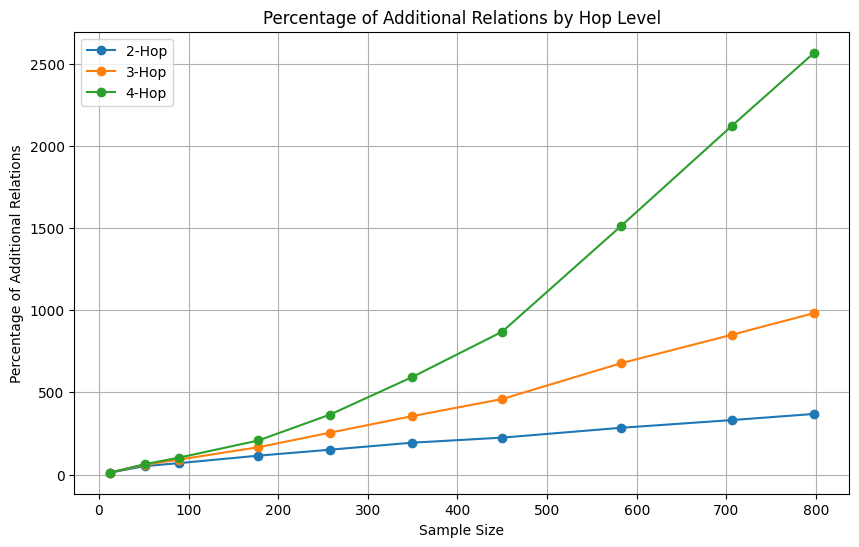

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 1'], label='2-Hop', marker='o')
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 2'], label='3-Hop', marker='o')
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 3'], label='4-Hop', marker='o')

# Labeling
plt.title('Percentage of Additional Relations by Hop Level')
plt.xlabel('Sample Size')
plt.ylabel('Percentage of Additional Relations')
plt.legend()
plt.grid(True)
plt.show()